# Evaluate Regression Model

[lesson link](https://ds.codeup.com/regression/evaluate/)

**import**

In [1]:
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
import warnings
import sys
warnings.filterwarnings('ignore')

# set a default them for all my visuals
sns.set_theme(style="whitegrid")

sys.path.append("./util_")
# Personal libraries
import evaluate_


**get data**

In [2]:
# load training data
train = pd.read_csv("./project_data/training_data.csv", index_col=0)
train.head()

,bedrooms,bathrooms,sqr_feet,tax_value,year_built,tax_amount,county
312463,4,2.0,1369.0,305725.0,1965,3409.40,Sam Juan
1269428,4,2.5,2474.0,421958.0,1977,4360.46,Orange
1875474,3,2.0,1675.0,201859.0,1990,3264.71,Los Angeles
1053441,3,2.0,2155.0,116034.0,1973,1889.24,Orange
494523,5,2.5,2224.0,365063.0,1994,3373.06,Orange


**Base line**

In [3]:
# estaplish a baseline prediction
baseline = train.tax_value.median()

y_hat_baseline = []
for i in range(len(train)):
    y_hat_baseline.append(baseline)
    
y_hat_baseline = np.array(y_hat_baseline)
y_hat_baseline

array([319237., 319237., 319237., ..., 319237., 319237., 319237.])

In [4]:
df_eval = train[["sqr_feet", "tax_value"]]
df_eval["y_hat_baseline"] = y_hat_baseline
df_eval.head()

,sqr_feet,tax_value,y_hat_baseline
312463,1369.0,305725.0,319237.0
1269428,2474.0,421958.0,319237.0
1875474,1675.0,201859.0,319237.0
1053441,2155.0,116034.0,319237.0
494523,2224.0,365063.0,319237.0


**Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.**

In [5]:
X = train[["sqr_feet"]]
target = train.tax_value

# make and fit the linear model object
ols_model = LinearRegression().fit(X, target)

y_hat = ols_model.predict(X)
y_hat

array([ 297986.03133289,  541576.12579463,  365441.74979922, ...,
        220169.46721977, 1067333.93148808,  315180.62623607])

In [6]:
df_eval["y_hat"] = y_hat
df_eval.head()

,sqr_feet,tax_value,y_hat_baseline,y_hat
312463,1369.0,305725.0,319237.0,297986.031333
1269428,2474.0,421958.0,319237.0,541576.125795
1875474,1675.0,201859.0,319237.0,365441.749799
1053441,2155.0,116034.0,319237.0,471254.641511
494523,2224.0,365063.0,319237.0,486465.244695


**Plot the residuals for the linear regression model that you made.**

<Axes: >

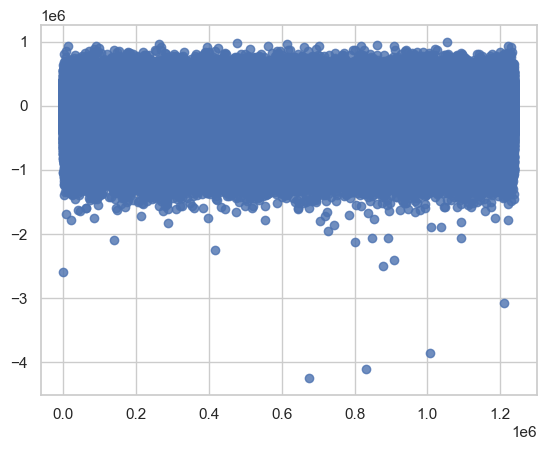

In [7]:
# substract the predicted from the actual to get the residual
residual = df_eval.y_hat - df_eval.tax_value

# Plot the residual
sns.regplot(x=np.arange(len(residual)),y=residual)

In [8]:
df_eval["residual"] = residual

# estaplish a residualbaseline prediction
r_baseline = df_eval.residual.median()

residual_baseline = []
for i in range(len(train)):
    residual_baseline.append(r_baseline)
    
residual = np.array(residual)
y_hat_baseline


df_eval["residual_baseline"] = residual_baseline
df_eval.head()

,sqr_feet,tax_value,y_hat_baseline,y_hat,residual,residual_baseline
312463,1369.0,305725.0,319237.0,297986.031333,-7738.968667,30238.520078
1269428,2474.0,421958.0,319237.0,541576.125795,119618.125795,30238.520078
1875474,1675.0,201859.0,319237.0,365441.749799,163582.749799,30238.520078
1053441,2155.0,116034.0,319237.0,471254.641511,355220.641511,30238.520078
494523,2224.0,365063.0,319237.0,486465.244695,121402.244695,30238.520078


**Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.**

**AND**

**Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).**

**SSE**

In [9]:
# calculate predicted sum of squared error
SSE = mean_squared_error(df_eval.tax_value, df_eval.y_hat) * len(df_eval)

# calculate baseline sum of squared error
SSE_base = mean_squared_error(df_eval.tax_value, df_eval.y_hat_baseline) * len(df_eval)
(SSE, SSE_base)

(7.092045767416913e+16, 1.0879091773700021e+17)

**ESS**

In [10]:
# compute explained sum of squares
ESS = sum((df_eval.y_hat - df_eval.tax_value.mean())**2)
ESS

3.217689382756802e+16

**TSS**

In [11]:
TSS = ESS + SSE
print("ESS = ", ESS)
print("SSE = ", SSE)
print("TSS = ", TSS)

ESS =  3.217689382756802e+16
SSE =  7.092045767416913e+16
TSS =  1.0309735150173715e+17


**MSE**

In [12]:
# calculate root mean squared error
MSE = mean_squared_error(df_eval.tax_value, df_eval.y_hat)

# calculate baseline mean squared error
MSE_base = mean_squared_error(df_eval.tax_value, df_eval.y_hat_baseline)
(MSE, MSE_base)

(57290849901.01731, 87883303958.6334)

**RMSE**

In [13]:
# calculate root mean squared error
RMSE = math.sqrt(mean_squared_error(df_eval.tax_value, df_eval.y_hat))

# calculate baseline root mean squared error
RMSE_base = math.sqrt(mean_squared_error(df_eval.tax_value, df_eval.y_hat_baseline))
(RMSE, RMSE_base)

(239355.0707652071, 296451.18309535115)

**Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.**

In [14]:
df_eval_break = pd.DataFrame(np.array(['SSE','MSE','RMSE']), columns=['metric'])
df_baseline_eval_break = pd.DataFrame(np.array(['SSE_baseline','MSE_baseline','RMSE_baseline']), columns=['metric'])

df_eval_break['model_error'] = np.array([SSE, MSE, RMSE])
df_baseline_eval_break['model_error'] = np.array([SSE_base, MSE_base, RMSE_base])


In [15]:
df_eval_break

,metric,model_error
0,SSE,7.092046e+16
1,MSE,5.729085e+10
2,RMSE,2.393551e+05


In [16]:
df_baseline_eval_break

,metric,model_error
0,SSE_baseline,1.087909e+17
1,MSE_baseline,8.788330e+10
2,RMSE_baseline,2.964512e+05


**What is the amount of variance explained in your model?**

$R^2$ coeficient

In [17]:
# sklearn.metrics.explained_variance_score

evs = explained_variance_score(df_eval.tax_value, df_eval.y_hat)
print('Explained Variance = ', round(evs,3))

Explained Variance =  0.312


**Is your model better than the baseline model?**

Yes

Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
    
___________
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false